In [1]:
from mylib.statistic_test import *
from mylib.statistic_test import GetMultidayIndexmap, ReadCellReg
from mylib.multiday.core import MultiDayCore

code_id = "0327 - Field Lifespan"
loc = join(figpath, code_id)
mkdir(loc)

if os.path.exists(join(figdata, code_id+'.pkl')):
    with open(join(figdata, code_id+'.pkl'), 'rb') as handle:
        Data = pickle.load(handle)
else:
    Data = DataFrameEstablish(variable_names = ['Lifespan', 'Count', 'Paradigm'], 
                             f_member=['Type'],
                             f = f_CellReg_modi, function = FieldLifespan_Interface, 
                             file_name = code_id, behavior_paradigm = 'CrossMaze'
           )

def exp_decay(x, a, c):
    return a*x + c

d:\SoftwareData\Anaconda\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        D:\Data\FinalResults\0327 - Field Lifespan is already existed!


0 [352.] [91.]
1 [0.] [0.]
2 [0.] [0.]
3 [0.] [0.]
4 [0.] [0.]
5 [0.] [0.]
[26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3
  2  1]


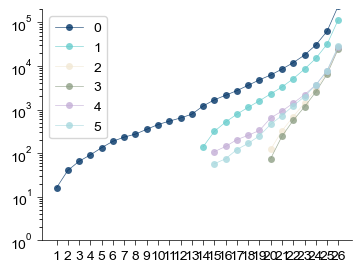

In [3]:
idxs = [np.where((np.isnan(Data['Count']) == False) & (Data['Type'] == 'Real') & (Data['Paradigm'] == 'CrossMaze') & (Data['Maze Type'] == 'Maze 1'))[0],
        np.where((np.isnan(Data['Count']) == False) & (Data['Type'] == 'Real') & (Data['Paradigm'] == 'CrossMaze') & (Data['Maze Type'] == 'Maze 2'))[0],
        np.where((np.isnan(Data['Count']) == False) & (Data['Type'] == 'Real') & (Data['Paradigm'] == 'HairpinMaze cis'))[0],
        np.where((np.isnan(Data['Count']) == False) & (Data['Type'] == 'Real') & (Data['Paradigm'] == 'HairpinMaze trs'))[0],
        np.where((np.isnan(Data['Count']) == False) & (Data['Type'] == 'Real') & (Data['Paradigm'] == 'ReverseMaze cis'))[0],
        np.where((np.isnan(Data['Count']) == False) & (Data['Type'] == 'Real') & (Data['Paradigm'] == 'ReverseMaze trs'))[0]]
xlims = [26, 26, 26, 26, 26, 26]
fig = plt.figure(figsize=(4, 3))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
colors = ['#003366', '#66CCCC', '#F2E8D4', '#8E9F85', '#C3AED6', '#A7D8DE']
for i, idx in enumerate(idxs):
    SubData = SubDict(Data, Data.keys(), idx)
    x = np.arange(xlims[i]+1)
    y = np.zeros(xlims[i]+1)
    for j in range(xlims[i]):
        y[j] = np.sum(SubData['Count'][np.where(SubData['Lifespan'] == j+1)[0]])
        
    # reverse y
    y = y[::-1]
    # Fit x and y with exponentital function
    #params, _ = curve_fit(exp_decay, x[y > 0], np.log(y)[y > 0], p0=[-3, 10000])
    print(i, y[x == 26-18+1], y[x==26-23+1])
    ax.plot(x[y > 0], y[y > 0], color=colors[i], linewidth=.5, 
            marker = 'o', markeredgewidth = 0, markersize = 5, 
            alpha = 0.8, label=str(i))
ax.legend()
ax.semilogy()
ax.set_ylim(1, 200000)
ax.set_yticks([1, 10, 100, 1000, 10000, 100000])
ax.set_xticks(np.arange(26, 0, -1))
print(np.arange(26, 0, -1))
plt.savefig(join(loc, "lifespan.png"), dpi=600)
plt.savefig(join(loc, "lifespan.svg"), dpi=600)
plt.show()